116.154.161.59
The coordinates 39.9122, 116.3561 are within the file: /Volumes/Extreme SSD/topg_europa/tif/10_DEM_y30x110.tif


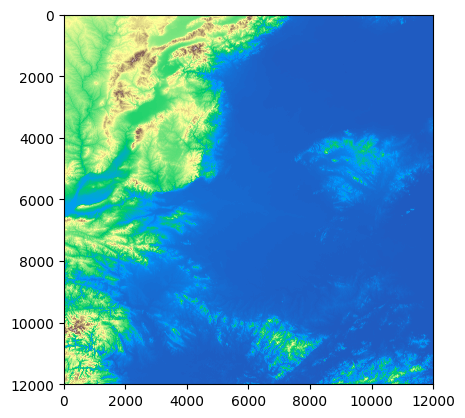

In [10]:
import os
import re
import requests
import rasterio
from rasterio.plot import show
import random

def generate_random_ip():
    return ".".join(str(random.randint(0, 255)) for _ in range(4))


def ip_to_latlong(ip_address):
    # Query the ipinfo.io API for geolocation data of the IP
    response = requests.get(f"https://ipinfo.io/{ip_address}/json")
    
    if response.status_code == 200:
        data = response.json()
        if 'loc' in data:
            # Split the 'loc' string into latitude and longitude
            latitude, longitude = data['loc'].split(',')
            return float(latitude), float(longitude)
        else:
            print("Could not retrieve location for this IP.")
            return None
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

def parse_filename_to_bounds(filename):
    match = re.match(r"(\d+)_DEM_y(-?\d+)x(-?\d+)\.tif", filename)
    if not match:
        raise ValueError("Invalid file name format")

    size = int(match.group(1))
    lat = int(match.group(2))
    lon = int(match.group(3))
    return lat, lon, lat + size, lon + size

def is_within_bounds(lat, lon, bounds):
    min_lat, min_lon, max_lat, max_lon = bounds
    return min_lat <= lat < max_lat and min_lon <= lon < max_lon

def find_corresponding_tif(lat, lon, directory):
    for filename in os.listdir(directory):
        if filename.endswith('.tif'):
            try:
                bounds = parse_filename_to_bounds(filename)
                if is_within_bounds(lat, lon, bounds):
                    return os.path.join(directory, filename)
            except ValueError:
                continue
    return None

# Function definitions (ip_to_latlong, parse_filename_to_bounds, is_within_bounds, find_corresponding_tif)
# [Include the functions previously provided here]

# Visualization function
def visualize_tif(file_path):
    with rasterio.open(file_path) as file:
        data = file.read(1)  # read the first band
        show(data, cmap='terrain')
 
# Use IP to find latitude and longitude
# ip_address = "8.8.8.8"  # Replace with the IP address you're checking
ip_address = generate_random_ip()
print(ip_address)
tif_directory = "/Volumes/Extreme SSD/topg_europa/tif"

latlong = ip_to_latlong(ip_address)
if latlong:
    latitude, longitude = latlong
    corresponding_tif = find_corresponding_tif(latitude, longitude, tif_directory)
    if corresponding_tif:
        print(f"The coordinates {latitude}, {longitude} are within the file: {corresponding_tif}")
        if os.path.isfile(corresponding_tif):  # Check if the file actually exists
            visualize_tif(corresponding_tif)
        else:
            print(f"The file {corresponding_tif} does not exist. Exiting.")
    else:
        print(f"No corresponding .tif file found for the coordinates {latitude}, {longitude}")
else:
    print("Could not get latitude and longitude for the IP address provided.")